# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

## Изучение данных из файла

In [108]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
df = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
df #посмотрим на датасет

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,9700000.0,133.81,2017-03-21T00:00:00,3,3.70,5.0,73.3,3,NaN,...,13.83,NaN,Санкт-Петербург,24665.0,4232.0,1.0,796.0,3.0,381.0,NaN
23695,14,3100000.0,59.00,2018-01-15T00:00:00,3,NaN,5.0,38.0,4,NaN,...,8.50,NaN,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.0
23696,18,2500000.0,56.70,2018-02-11T00:00:00,2,NaN,3.0,29.7,1,NaN,...,NaN,NaN,село Рождествено,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23697,13,11475000.0,76.75,2017-03-28T00:00:00,2,3.00,17.0,NaN,12,NaN,...,23.30,2.0,Санкт-Петербург,39140.0,10364.0,2.0,173.0,3.0,196.0,602.0


In [109]:
df.info() #посмотрим на типы данных

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around300

### Вывод

 При выводе таблицы датасет склеился и пришлось его разделить с помощью sep='\t'.

 Итого имеем таблицу с 23699 строками и 22 столбцами.

 Во многих столбцах имеются пропуски.

 Большинство столбцов содержат данные в виде десятичных дробей, хотя этого не требуется, предстоит сменить тип данных.

+ total_images — число фотографий квартиры в объявлении
+ last_price — цена на момент снятия с публикации **(дробь/целое число)**	
+ total_area — площадь квартиры в квадратных метрах (м²)
+ first_day_exposition — дата публикации	
+ rooms — число комнат
+ ceiling_height — высота потолков (м)
+ floors_total — всего этажей в доме **(дробь/целое число)**		
+ living_area — жилая площадь в квадратных метрах (м²)
+ floor — этаж
+ is_apartment — апартаменты (булев тип)	
+ studio — квартира-студия (булев тип)	
+ open_plan — свободная планировка (булев тип)	
+ kitchen_area — площадь кухни в квадратных метрах (м²)
+ balcony — число балконов **(дробь/целое число)**	
+ locality_name — название населённого пункта
+ airports_nearest — расстояние до ближайшего аэропорта в метрах (м) **(дробь/целое число)**	
+ cityCenters_nearest — расстояние до центра города (м) **(дробь/целое число)**	
+ parks_around3000 — число парков в радиусе 3 км	**(дробь/целое число)**	
+ parks_nearest — расстояние до ближайшего парка (м) **(дробь/целое число)**	
+ ponds_around3000 — число водоёмов в радиусе 3 км **(дробь/целое число)**	
+ ponds_nearest — расстояние до ближайшего водоёма (м) **(дробь/целое число)**		
+ days_exposition — сколько дней было размещено объявление (от публикации до снятия) **(дробь/целое число)**	

## Предобработка данных

In [110]:
#рассмотрим часть таблицы с дробными числами которым можно придать целочисленный вид


(
    df.loc[:, ['last_price', 'floors_total', 'balcony', 'airports_nearest', 'cityCenters_nearest',
               'parks_around3000', 'parks_nearest', 'ponds_around3000', 'ponds_nearest', 'days_exposition']]
)

,last_price,floors_total,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,13000000.0,16.0,NaN,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,3350000.0,11.0,2.0,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,5196000.0,5.0,0.0,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,64900000.0,14.0,0.0,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,10000000.0,14.0,NaN,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
...,...,...,...,...,...,...,...,...,...,...
23694,9700000.0,5.0,NaN,24665.0,4232.0,1.0,796.0,3.0,381.0,NaN
23695,3100000.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,45.0
23696,2500000.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23697,11475000.0,17.0,2.0,39140.0,10364.0,2.0,173.0,3.0,196.0,602.0


In [111]:
#преобразуем в целые числа 

int_columns = ('last_price, floors_total, balcony, airports_nearest, cityCenters_nearest, parks_around3000, parks_nearest, ponds_around3000, ponds_nearest, days_exposition')               
int_columns = int_columns.split(', ')
for column in int_columns:
    df[column] = pd.to_numeric(df[column], errors='coerce', downcast='integer')
    
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null int32
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around3000 

In [112]:
#в населенных пунктах встречаются заглавные буквы, приведем их к единому виду
df['locality_name'] = df['locality_name'].str.lower()
#проверка
df['locality_name'].head()


0    санкт-петербург
1     посёлок шушары
2    санкт-петербург
3    санкт-петербург
4    санкт-петербург
Name: locality_name, dtype: object

In [113]:
#первый столбец имеющий пропуски 'ceiling_height' - высота потолка
df['ceiling_height'].isna().sum()

9195

In [114]:
df['ceiling_height']

0        2.70
1         NaN
2         NaN
3         NaN
4        3.03
         ... 
23694    3.70
23695     NaN
23696     NaN
23697    3.00
23698    2.50
Name: ceiling_height, Length: 23699, dtype: float64

In [115]:
#в столбце с высотой потолка видны явные ошибки, высота потолка не может быть 100 метров,
#и если речь идет о квартирах, ограничимся максимальной высотой в 3 метра (сталинки или дореволюционные дома)
#точно также минимальная высота не может быть ниже потолков в хрущевке - 2,20м
df['ceiling_height'].unique()

array([  2.7 ,    nan,   3.03,   2.5 ,   2.67,   2.56,   3.05,   2.75,
         2.6 ,   2.9 ,   2.8 ,   2.55,   3.  ,   2.65,   3.2 ,   2.61,
         3.25,   3.45,   2.77,   2.85,   2.64,   2.57,   4.15,   3.5 ,
         3.3 ,   2.71,   4.  ,   2.47,   2.73,   2.84,   3.1 ,   2.34,
         3.4 ,   3.06,   2.72,   2.54,   2.51,   2.78,   2.76,  25.  ,
         2.58,   3.7 ,   2.52,   5.2 ,   2.87,   2.66,   2.59,   2.  ,
         2.45,   3.6 ,   2.92,   3.11,   3.13,   3.8 ,   3.15,   3.55,
         3.16,   3.62,   3.12,   2.53,   2.74,   2.96,   2.46,   5.3 ,
         5.  ,   2.79,   2.95,   4.06,   2.94,   3.82,   3.54,   3.53,
         2.83,   4.7 ,   2.4 ,   3.38,   3.01,   5.6 ,   3.65,   3.9 ,
         3.18,   3.35,   2.3 ,   3.57,   2.48,   2.62,   2.82,   3.98,
         2.63,   3.83,   3.52,   3.95,   3.75,   2.88,   3.67,   3.87,
         3.66,   3.85,   3.86,   4.19,   3.24,   4.8 ,   4.5 ,   4.2 ,
         3.36,  32.  ,   3.08,   3.68,   3.07,   3.37,   3.09,   8.  ,
      

In [116]:
#Уберем значения больше высоты потолков в сталинках и меньше высоты потолков в хрущевках
def ceiling_height_function(row):
    if row > 3:
        return 3
    elif row < 2.2:
        return 2.2
    return row
#применим функцию и округлим до десятых    
df['ceiling_height'] = df['ceiling_height'].apply(ceiling_height_function).round(decimals = 1)

In [117]:
#Проверим высоту потолков
df['ceiling_height'].unique()

array([2.7, nan, 3. , 2.5, 2.6, 2.8, 2.9, 2.3, 2.2, 2.4])

In [118]:
#возьмем значения NaN и подставим вместо них средние значения потолка
df['ceiling_height'] = df['ceiling_height'].fillna(df['ceiling_height'].mean()).round(decimals = 1)  

In [119]:
#сразу проверим
df['ceiling_height'].isna().sum()

0

In [120]:
#Следующий столбец с пропусками 'floors_total' - общее количество этажей в доме
df['floors_total'].isna().sum()

86

In [121]:
#заполняем средним значением, поскольку пропусков всего 86 и замена не скажется на общих цифрах,

df['floors_total'] = df['floors_total'].fillna(df['floors_total'].mean())

In [122]:
#проверяем пропуски
df['floors_total'].isna().sum()


0

In [123]:
#Следующий столбец с пропусками 'is_apartment' - апартаменты (булев тип), но у нас не булев значит предстоит еще сменить тип данных
#вернемся к апартаментам, пропусков так много потому что риелторы при размещении объявлении используют столбец 'is_apartment',
#только в случае продажи апартаментов.
df['is_apartment'].isna().sum()

20924

In [124]:
#заменим пропуски значениями 0, чтобы метод .astype() выдавал False, что соответствует квартирам
df['is_apartment'] = df['is_apartment'].fillna(0)

In [125]:
#сменим тип данных
df['is_apartment'] = df['is_apartment'].astype(bool)

In [126]:
#проверим пропуски
df['is_apartment'].isna().sum()

0

In [127]:
#Из задания сразу дается подсказка:
    #Для некоторых пропущенных значений можно предположить логичную замену. 
    #Например, если человек не указал число балконов — скорее всего, их нет. 
    #Такие пропуски правильно заменить на 0.
df['balcony'] = df['balcony'].fillna(0)

In [128]:
df

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000,108.00,2019-03-07T00:00:00,3,2.7,16.0,51.0,8,False,...,25.00,0.0,санкт-петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000,40.40,2018-12-04T00:00:00,1,2.7,11.0,18.6,1,False,...,11.00,2.0,посёлок шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000,56.00,2015-08-20T00:00:00,2,2.7,5.0,34.3,4,False,...,8.30,0.0,санкт-петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000,159.00,2015-07-24T00:00:00,3,2.7,14.0,NaN,9,False,...,NaN,0.0,санкт-петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000,100.00,2018-06-19T00:00:00,2,3.0,14.0,32.0,13,False,...,41.00,0.0,санкт-петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,9700000,133.81,2017-03-21T00:00:00,3,3.0,5.0,73.3,3,False,...,13.83,0.0,санкт-петербург,24665.0,4232.0,1.0,796.0,3.0,381.0,NaN
23695,14,3100000,59.00,2018-01-15T00:00:00,3,2.7,5.0,38.0,4,False,...,8.50,0.0,тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.0
23696,18,2500000,56.70,2018-02-11T00:00:00,2,2.7,3.0,29.7,1,False,...,NaN,0.0,село рождествено,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23697,13,11475000,76.75,2017-03-28T00:00:00,2,3.0,17.0,NaN,12,False,...,23.30,2.0,санкт-петербург,39140.0,10364.0,2.0,173.0,3.0,196.0,602.0


В процессе предобработки были изменены типы данных там где это необходимо и убраны пропуски, там где это не повлияет на результат.

In [129]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null int32
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          23699 non-null float64
floors_total            23699 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            23699 non-null bool
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 23699 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around3000  

In [130]:
#Посчитаем количество пропусков в 'living_area'
df['living_area'].isna().sum()

1903

In [131]:
#вместо пропусков подставим среднее значение в 'living_area'
df['living_area'] = df['living_area'].fillna(df['living_area'].mean())

In [132]:
#проверим
df['living_area'].isna().sum()

0

In [133]:
#Посчитаем количество пропусков в 'kitchen_area'
df['kitchen_area'].isna().sum()

2278

In [134]:
#вместо пропусков подставим среднее значение в 'kitchen_area'
df['kitchen_area'] = df['kitchen_area'].fillna(df['kitchen_area'].mean())

In [135]:
#проверим
df['kitchen_area'].isna().sum()

0

In [136]:
#считаем пропуски в 'days_exposition'
df['days_exposition'].isna().sum()

3181

In [137]:
#меняем тип данных в 'days_exposition', попутно заполняя пропуски средним значением
df['days_exposition'] = df['days_exposition'].fillna(df['days_exposition'].mean())

In [138]:
#проверим
df['days_exposition'].isna().sum()

0

In [139]:
#меняем тип данных в 'days_exposition'
df['days_exposition'] = df['days_exposition'].astype(int)

In [140]:
#меняем тип данных в 'balcony'
df['balcony'] = df['balcony'].astype(int)

In [141]:
#меняем тип данных в 'floors_total'
df['floors_total'] = df['floors_total'].astype(int)

In [142]:
df['locality_name'].unique()

array(['санкт-петербург', 'посёлок шушары', 'городской посёлок янино-1',
       'посёлок парголово', 'посёлок мурино', 'ломоносов', 'сертолово',
       'петергоф', 'пушкин', 'деревня кудрово', 'коммунар', 'колпино',
       'поселок городского типа красный бор', 'гатчина', 'поселок мурино',
       'деревня фёдоровское', 'выборг', 'кронштадт', 'кировск',
       'деревня новое девяткино', 'посёлок металлострой',
       'посёлок городского типа лебяжье',
       'посёлок городского типа сиверский', 'поселок молодцово',
       'поселок городского типа кузьмоловский',
       'садовое товарищество новая ропша', 'павловск',
       'деревня пикколово', 'всеволожск', 'волхов', 'кингисепп',
       'приозерск', 'сестрорецк', 'деревня куттузи', 'посёлок аннино',
       'поселок городского типа ефимовский', 'посёлок плодовое',
       'деревня заклинье', 'поселок торковичи', 'поселок первомайское',
       'красное село', 'посёлок понтонный', 'сясьстрой', 'деревня старая',
       'деревня лесколово', '

In [143]:
#меняем ё на е
import re
i = 0 #счетчик строк где Ё и ё
for index in df.loc[(df['locality_name'].isna()==False),'locality_name'].index:    
    loc_str = df.loc[index, 'locality_name']
    if 'ё' in loc_str:
        i+=1
        loc_str = re.sub('ё', 'е', loc_str)
    df.loc[index, 'locality_name'] = loc_str
print("Кол-во строк где произведена замена =", i)

Кол-во строк где произведена замена = 2146


In [144]:
#смотрим уникальные значения
df['locality_name'].unique()

array(['санкт-петербург', 'поселок шушары', 'городской поселок янино-1',
       'поселок парголово', 'поселок мурино', 'ломоносов', 'сертолово',
       'петергоф', 'пушкин', 'деревня кудрово', 'коммунар', 'колпино',
       'поселок городского типа красный бор', 'гатчина',
       'деревня федоровское', 'выборг', 'кронштадт', 'кировск',
       'деревня новое девяткино', 'поселок металлострой',
       'поселок городского типа лебяжье',
       'поселок городского типа сиверский', 'поселок молодцово',
       'поселок городского типа кузьмоловский',
       'садовое товарищество новая ропша', 'павловск',
       'деревня пикколово', 'всеволожск', 'волхов', 'кингисепп',
       'приозерск', 'сестрорецк', 'деревня куттузи', 'поселок аннино',
       'поселок городского типа ефимовский', 'поселок плодовое',
       'деревня заклинье', 'поселок торковичи', 'поселок первомайское',
       'красное село', 'поселок понтонный', 'сясьстрой', 'деревня старая',
       'деревня лесколово', 'поселок новый свет

In [145]:
#удаляем типы населенных пунктов, оставляя их имена
df['locality_name'] = df['locality_name'].astype('str')
for name in ['поселок', 'деревня', 'село', 'садовое', 'товарищество', 'станции', 'городского типа', 
             'садоводческое некоммерческое', 'при железнодорожной', 'коттеджный', 'городской', 'пансионат']:
    df['locality_name'] = df['locality_name'].str.replace(name,'')

In [146]:
#проверяем
df['locality_name'].unique()

array(['санкт-петербург', ' шушары', '  янино-1', ' парголово', ' мурино',
       'ломоносов', 'сертолово', 'петергоф', 'пушкин', ' кудрово',
       'коммунар', 'колпино', '  красный бор', 'гатчина', ' федоровское',
       'выборг', 'кронштадт', 'кировск', ' новое девяткино',
       ' металлострой', '  лебяжье', '  сиверский', ' молодцово',
       '  кузьмоловский', '  новая ропша', 'павловск', ' пикколово',
       'всеволожск', 'волхов', 'кингисепп', 'приозерск', 'сестрорецк',
       ' куттузи', ' аннино', '  ефимовский', ' плодовое', ' заклинье',
       ' торковичи', ' первомайское', 'красное ', ' понтонный',
       'сясьстрой', ' старая', ' лесколово', ' новый свет', 'сланцы',
       ' путилово', 'ивангород', 'мурино', 'шлиссельбург', 'никольское',
       'зеленогорск', 'сосновый бор', ' оржицы', ' кальтино', 'кудрово',
       ' романовка', ' бугры', '  рощино', 'кириши', 'луга', 'волосово',
       'отрадное', ' павлово', ' оредеж', ' копорье', ' молодежное',
       'тихвин', ' побе

In [147]:
#дубликатов нет
df.duplicated().sum()

0

## Расчёты и добавление результатов в таблицу

**Цена квадратного метра**

In [148]:
#найдем цену квадратного метра и добавим значения в таблицу
df['price_m2'] = df['last_price']/df['total_area']
df['price_m2'].head()

0    120370.370370
1     82920.792079
2     92785.714286
3    408176.100629
4    100000.000000
Name: price_m2, dtype: float64

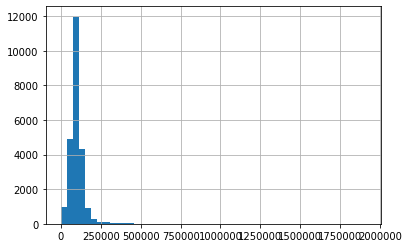

In [149]:
df['price_m2'].hist(bins=50)

**День недели, месяц и год публикации объявления**

In [150]:
#добавим столбцы дня недели, месяца и года публикации объявления
df['weekday'] = pd.DatetimeIndex(df['first_day_exposition']).weekday
df['month'] = pd.DatetimeIndex(df['first_day_exposition']).month
df['year'] = pd.DatetimeIndex(df['first_day_exposition']).year

In [151]:
#Уберем часы минуты секунды из стоблца 'first_day_exposition'
df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'],format='%Y-%m-%d')
# и проверим
df['first_day_exposition'].tail()

23694   2017-03-21
23695   2018-01-15
23696   2018-02-11
23697   2017-03-28
23698   2017-07-21
Name: first_day_exposition, dtype: datetime64[ns]

**Этаж квартиры; варианты — первый, последний, другой**

In [152]:
#пропишем этажность квартиры с помощью функции
def floor_function(row):
    if row['floor'] == 1:
        return 'первый'
    elif row['floor'] == row['floors_total']:
        return 'последний'
    return 'другой'

#берём значения датафрейма и применяем к ним функцию со своим аргументом   
df['floor_position'] = df.apply(floor_function, axis = 1)

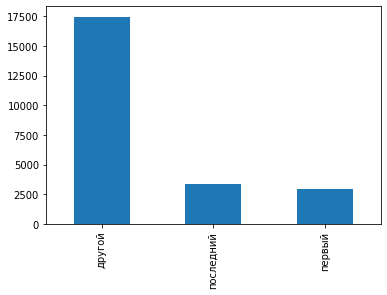

In [153]:
#строим диаграмму распределения этажности
df['floor_position'].value_counts().plot(kind='bar')

**Cоотношение жилой и общей площади, а также отношение площади кухни к общей**

In [154]:
#найдем отношение жилой площади к общей 
df['ratio_living_total'] = df['living_area'] / df['total_area']
#найдем отношение площади кухни к общей площади
df['ratio_kitchen_total'] = df['kitchen_area'] / df['total_area']

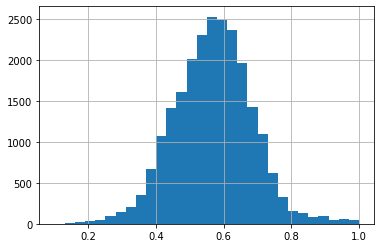

In [155]:
#около половины всей площади квартиры занимает жилая зона
df['ratio_living_total'].hist(bins=30, range=(0.1, 1))

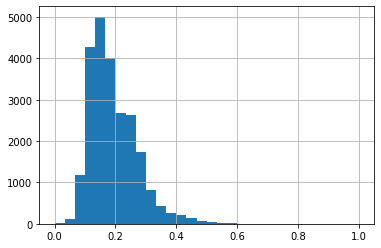

In [156]:
#всего лишь одну десятую занимает кухня от общей площади, это объясняется наличием квартир с большой общей площадью
df['ratio_kitchen_total'].hist(bins=30, range=(0, 1))

**Площадь, цена, число комнат, высота потолков**

In [157]:
#рассмотрим столбцы: 'total_area', 'last_price', 'rooms', 'ceiling_height'
(
    df.loc[:, ['total_area', 'last_price', 'rooms', 'ceiling_height']]
)

,total_area,last_price,rooms,ceiling_height
0,108.00,13000000,3,2.7
1,40.40,3350000,1,2.7
2,56.00,5196000,2,2.7
3,159.00,64900000,3,2.7
4,100.00,10000000,2,3.0
...,...,...,...,...
23694,133.81,9700000,3,3.0
23695,59.00,3100000,3,2.7
23696,56.70,2500000,2,2.7
23697,76.75,11475000,2,3.0


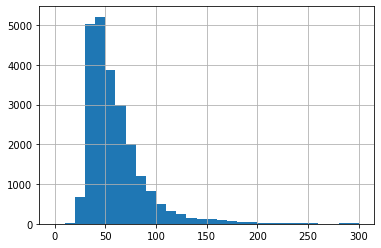

In [158]:
#подавляющее число квартир площадью до 50 квадратов
df['total_area'].hist(bins=30, range=(0, 300))

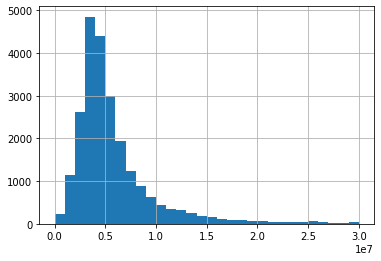

In [159]:
#подавляющее число квартир стоимостью от 3 до 5 млн 
df['last_price'].hist(bins=30,range=(0,30000000))

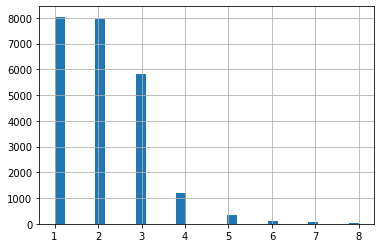

In [160]:
#построим гистограмму, показывающую какую долю занимают квартиры с разным количеством комнат в датасете
df['rooms'].hist(bins=30,range=(1,8))

Как видно из гистограммы в продаже примерно равное количество однушек и двушек, они являются лидерами продаж,
за ними следуют трешки, далее идут квартиры с количеством комнат более трех их заметно меньше, поскольку они менее популярны

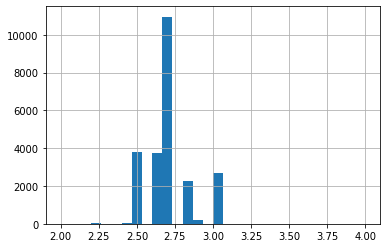

In [161]:
#построим гистограмму высоты потолков
df['ceiling_height'].hist(bins=30,range=(2,4))

Наибольшим изменениям в процессе предобработки данных подвергся столбец с высотой потолков.
безоговорочным лидером являются квартиры с потолками до 2,7 метров, по всей видимости это дома-новостройки, к сожалению в датафрейме отсутствует очень важный столбец года постройки дома, из за чего нельзя сказать точно.

## Исследовательский анализ данных

**Изучим время продажи квартир**


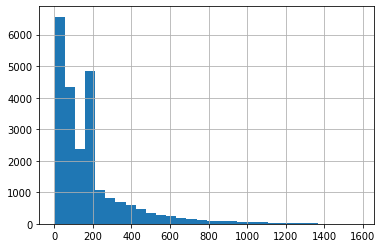

In [162]:
#построим гистограмму
df['days_exposition'].hist(bins=30)

In [163]:
#минимальное время, которое потребовалось для продажи - 1 день
df['days_exposition'].min()

1

In [164]:
#максимальное время, которое потребовалось для продаж - 4 года и 3 месяца
df['days_exposition'].max()/365

4.328767123287672

In [165]:
#Медианное время
df['days_exposition'].median()

124.0

In [166]:
#среднее время
df['days_exposition'].mean()

180.7693573568505

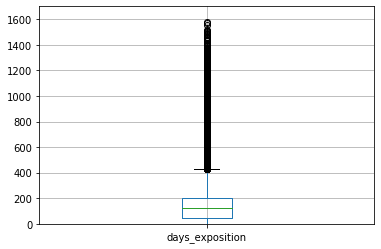

count    23699.000000
mean       180.769357
std        204.449917
min          1.000000
25%         45.000000
50%        124.000000
75%        199.000000
max       1580.000000
Name: days_exposition, dtype: float64

In [167]:
import matplotlib.pyplot as plt 
plt.ylim(0,1700)
df.boxplot(column = 'days_exposition') 
plt.show()
df['days_exposition'].describe()




Максимальное число квартир продается в на 95 день, больше всего квартир продается в интервале от 45 дней до 232.
Самой долгой продажей (если не брать во внимание выбросы, которые лежат за 1.5 межквартального размаха, добавленного в третьей квартилии) - 500 дней.

In [168]:
#уберем выбросы
df = df.query('days_exposition<500')

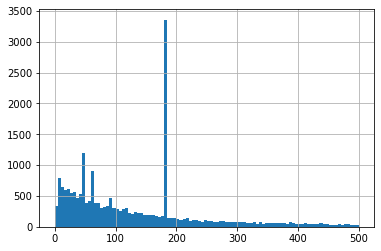

In [169]:
#диаграмма без выбросов
df['days_exposition'].hist(bins=100,range=(0,500))

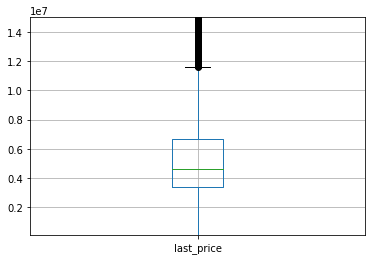

In [170]:
#Диаграмма размаха говорит, что самые дорогие квартиры продаются дольше всего, в данном случае 
#11 млн уже барьер для быстрой продажи
plt.ylim(100000,15000000)
df.boxplot(column='last_price')
plt.show()

In [171]:
df.sort_values(by='last_price',ascending=True)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,price_m2,weekday,month,year,floor_position,ratio_living_total,ratio_kitchen_total
8793,7,12190,109.0,2019-03-20,2,2.8,25,32.000000,25,False,...,0.0,NaN,8,1.118349e+02,2,3,2019,последний,0.293578,0.371560
14911,5,430000,54.0,2018-06-26,2,2.7,3,34.457852,3,False,...,NaN,NaN,44,7.962963e+03,1,6,2018,последний,0.638108,0.195737
17456,7,430000,30.4,2019-04-22,1,2.7,2,16.000000,1,False,...,NaN,NaN,180,1.414474e+04,0,4,2019,первый,0.526316,0.197368
16274,18,440000,40.0,2018-07-10,1,2.7,5,34.457852,1,False,...,NaN,NaN,45,1.100000e+04,1,7,2018,первый,0.861446,0.264245
17676,0,450000,36.5,2018-02-01,1,2.7,5,17.300000,4,False,...,NaN,NaN,120,1.232877e+04,3,2,2018,другой,0.473973,0.232877
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15651,20,300000000,618.0,2017-12-18,7,3.0,7,258.000000,5,False,...,2.0,198.0,111,4.854369e+05,0,12,2017,другой,0.417476,0.113269
1436,19,330000000,190.0,2018-04-04,3,3.0,7,95.000000,5,False,...,3.0,285.0,233,1.736842e+06,2,4,2018,другой,0.500000,0.210526
14706,15,401300000,401.0,2016-02-20,5,2.7,9,204.000000,9,False,...,1.0,478.0,393,1.000748e+06,5,2,2016,последний,0.508728,0.059850
19540,8,420000000,900.0,2017-12-06,12,2.8,25,409.700000,25,False,...,2.0,318.0,106,4.666667e+05,2,12,2017,последний,0.455222,0.124444


In [172]:
#уберем выбросы квартир стоимостью свыше 11 млн. руб,и одну квартиру которая стоит всего 12190руб., что естественно тоже опечатка
df = df.query('430000<last_price<11000000').reset_index(drop = True)



Для продажи квартиры требуется чуть больше трех месяцев. средний показатель 180, в таблице есть квартиры которые продаются очень долго. Согласно boxplot верхний ус около 500 дней. Все, что продается дольше, можно считать необычно долгой продажей.

In [173]:
#рассмотрим столбец 'rooms' - квартир с нулевым количеством комнат не бывает
df['rooms'].value_counts()

1    7506
2    7039
3    4437
4     642
0     188
5      86
6       8
7       1
Name: rooms, dtype: int64

In [174]:
#Посмотрим значения площадей квартир в этих строках
#видно что площадь менее 30кв. это однокомнатные квартиры
df.query('rooms == 0')['total_area'].describe()

count    188.000000
mean      27.261755
std        6.727197
min       15.500000
25%       24.175000
50%       26.075000
75%       28.325000
max       73.600000
Name: total_area, dtype: float64

In [175]:
#заменим квартиры с нулевым количеством комнат на однокомнатные
df['rooms'] = df['rooms'].replace(0, 1)

In [176]:
#проверка
df['rooms'].value_counts()

1    7694
2    7039
3    4437
4     642
5      86
6       8
7       1
Name: rooms, dtype: int64

In [177]:
#максимальный этаж не превышает этажность зданий, здесь все ровно.
df['floor'].max()

33

In [178]:
df['floors_total'].max()

60

**Факторы, влияющие на стоимость квартиры**

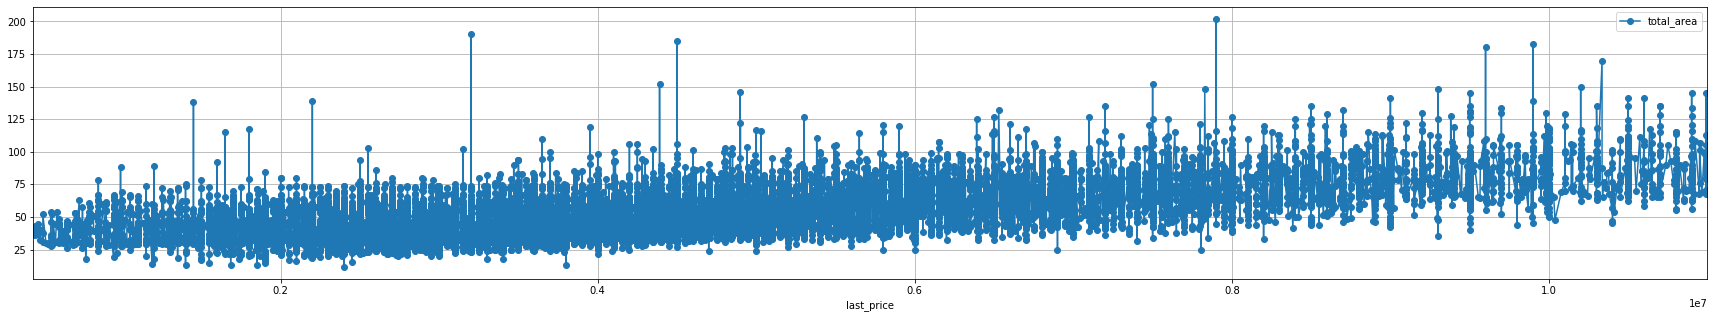

In [179]:
#зависимость цены от метража
(
    df.sort_values(by='last_price',ascending=True)
    .plot(x='last_price',y='total_area',grid=True, style='o-',figsize=(30,5))
)

Цена растет с увеличением площади, в этом нет ничего удивительного.

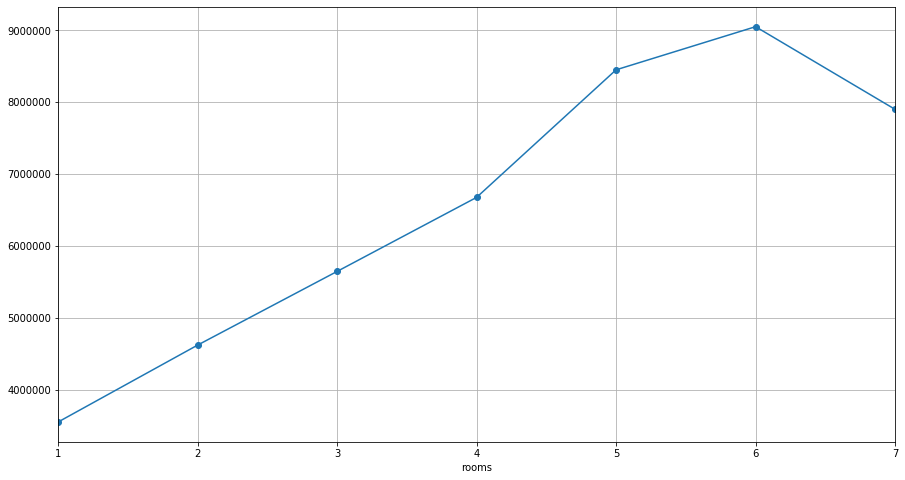

In [180]:
#зависимость цены от количества комнат
(
    df.groupby('rooms')['last_price'].median().plot
    (x='rooms',y='last_price',style='o-',grid=True,figsize=(15,8),alpha=1)
)

Цена равномерно растет с увеличением числа комнат, при этом после четырехкомнатных квартир мы видим резкий рост цены,
видимо здесь вступает в силу класс жилья, эконом сменился бизнесом, 7-комнатные квартиры ниже в стоимости 6 комнатных, по видимому из за их неликвидности.

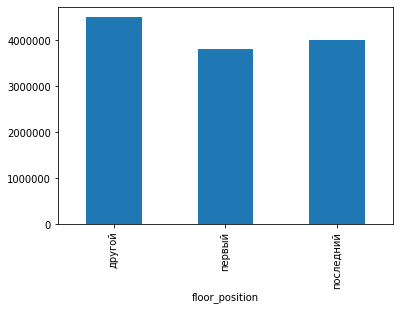

In [181]:
#зависимость цены от этажа
(
    df.groupby('floor_position')['last_price'].median()
    .plot(x='floor_position',y='last_price',kind='bar')
)

Цена на первом и последнем этаже ниже рынка, неписанное правило, на первом этаже заметно больше шума и выше вероятность появления всяких вредителей, на последнем этаже проблема лифта и протечек крыш.

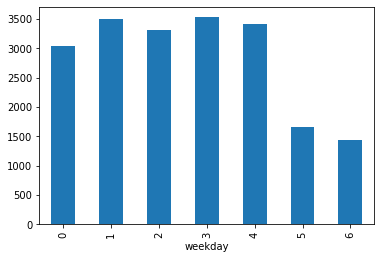

In [182]:
#зависимость цены от дня недели
#df['weekday'] df['Month'] df['Year']
(
    df.groupby('weekday')['last_price'].count()
    .plot(x='weekday',y='last_price',kind='bar')
)

По субботам и воскресеньям проводится меньше всего сделок.

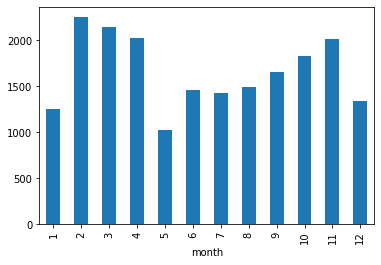

In [183]:
#зависимость цены от месяца
(
    df.groupby('month')['last_price'].count()
    .plot(x='month',y='last_price',kind='bar')
)

Меньше всего продаж в декабре, январе, а также в мае, кроме праздников никаких других причин снижения не наблюдается. Больше всего сделок проводится в феврале, ноябре.

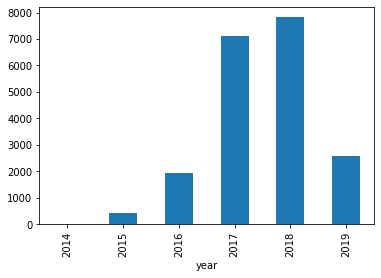

In [184]:
#зависимость цены от года
(
    df.groupby('year')['last_price'].count()
    .plot(x='year',y='last_price',kind='bar')
)

Пик продаж недвижимости пришелся на 2017-2018 года, если бы в датафреме присутствовали сделки за 2020 и 2021 год, их было бы в разы больше.

In [185]:
#зависимость цены от близости к центру
#переведем расстояние в километры и округлим до десятых для удобства.
df['cityCenters_nearest'] = (df['cityCenters_nearest'] / 1000).round(decimals = 1)

In [186]:
#вспомним содержимое столбцов 'last_price' и 'cityCenters_neares' 
(
    df.loc[:, ['last_price', 'cityCenters_nearest',]]
)

,last_price,cityCenters_nearest
0,3350000,18.6
1,10000000,8.1
2,2890000,NaN
3,3700000,19.1
4,7915000,11.6
...,...,...
19902,4600000,34.1
19903,9700000,4.2
19904,3100000,NaN
19905,2500000,NaN


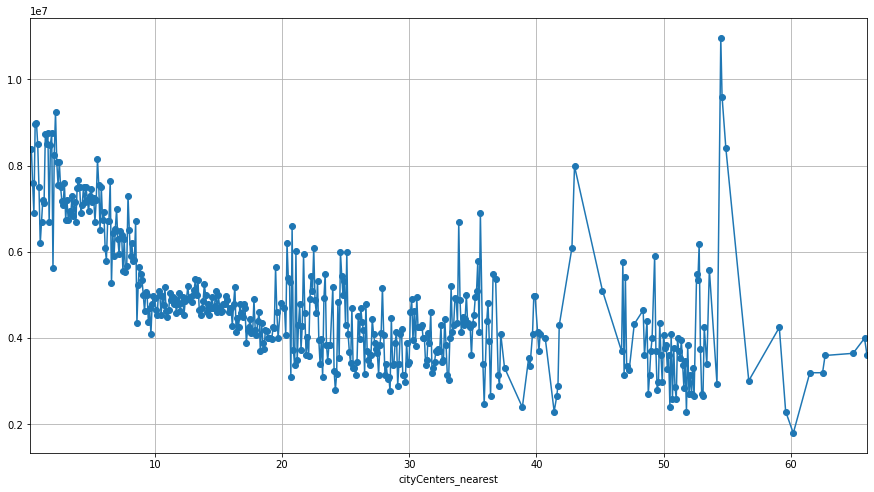

In [187]:
#построим график зависимости цены от близости к центру
(
    df.groupby('cityCenters_nearest')['last_price'].median().plot
    (x='cityCenters_nearest',y='last_price',style='o-',grid=True,figsize=(15,8),alpha=1)
)

Цена прямо пропорциональна близости к центру, чем ближе к центру тем выше цена, присутствуют несколько значений дорогой недвижимости далеко за городом, богатые любят жить вдали от городской суеты.

<div style="border:solid green 2px; padding: 20px"> 
    
**Комментарий ревьюера**

**#ок**

Отлично. Зависимости отображены верно
    
</div>

In [188]:
#Выберем 10 населённых пунктов с наибольшим числом объявлений
biggest_cities = df.pivot_table(index='locality_name',values='price_m2',aggfunc=('count','mean'))
biggest_cities.sort_values(by='count',ascending=False).head(10)

,count,mean
locality_name,,
санкт-петербург,12545,105034.712031
мурино,522,85915.986714
шушары,417,78647.981165
всеволожск,365,67080.918976
колпино,321,75122.070861
парголово,312,89914.894072
пушкин,311,99836.328823
гатчина,281,68582.891681
кудрово,265,92585.904864


Самая дорогая недвижимость в Питере, а самая дешевая в Выборге.

<div style="border:solid green 2px; padding: 20px"> 
    
**Комментарий ревьюера**

**#ок**

Топ получен правильно. После обработки названий числа немного скорректируются, но радикально картина не изменится
    
</div>

**Квартиры в Петербурге**

In [189]:
#выделим квартиры в Петербурге
saint_p = df.query('locality_name == "санкт-петербург"')
#округлим
saint_p['cityCenters_nearest'] = saint_p['cityCenters_nearest'].round()

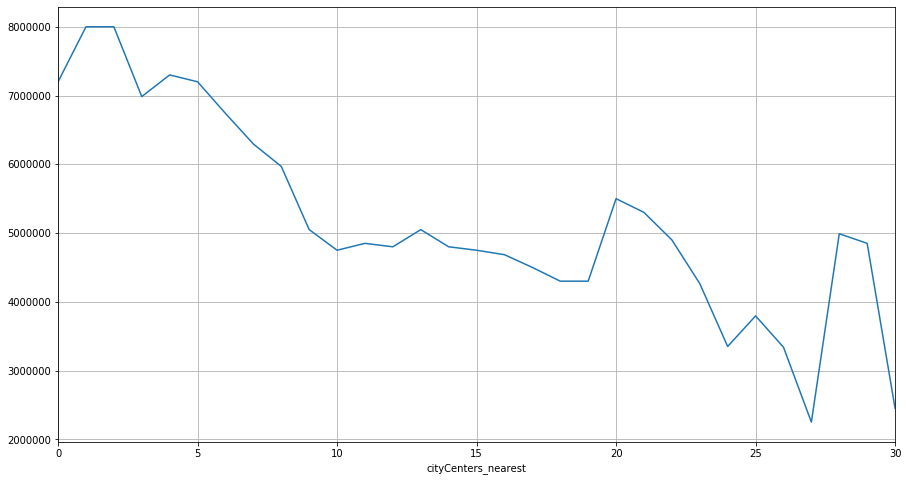

In [190]:
#строим график зависимости цены от удаленности к центру
(
    saint_p.groupby('cityCenters_nearest')['last_price'].median().plot
    (x='cityCenters_nearest',y='last_price',style='-',grid=True,figsize=(15,8),alpha=1)
)

Цена максимальна в пределах 5 километров от центра - это центральная зона, по удалении она начинает быстро падать.

**Центральная зона Питера**

In [191]:
#рассмотрим центральную зону Питера
centre_saint_p = saint_p.query('cityCenters_nearest <= 5')
centre_saint_p.describe().round(1)

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_m2,weekday,month,year,ratio_living_total,ratio_kitchen_total
count,1263.0,1263.0,1263.0,1263.0,1263.0,1263.0,1263.0,1263.0,1263.0,1263.0,...,812.0,1263.0,924.0,1263.0,1263.0,1263.0,1263.0,1263.0,1263.0,1263.0
mean,9.6,7307368.6,67.3,2.4,2.8,6.1,39.6,3.5,11.3,0.2,...,466.5,1.3,473.7,148.8,115151.9,2.5,6.6,2017.4,0.6,0.2
std,5.7,1930866.8,23.4,1.0,0.2,3.3,16.7,2.3,4.5,0.6,...,319.5,1.1,279.4,118.9,30621.6,1.7,3.4,0.9,0.1,0.1
min,0.0,1600000.0,12.0,1.0,2.4,2.0,6.0,1.0,2.0,0.0,...,17.0,0.0,22.0,3.0,15345.3,0.0,1.0,2015.0,0.1,0.1
25%,5.0,5970000.0,50.0,2.0,2.7,5.0,28.0,2.0,8.5,0.0,...,278.0,0.0,227.5,55.0,93295.1,1.0,3.0,2017.0,0.5,0.1
50%,9.0,7350000.0,65.6,2.0,2.8,5.0,36.6,3.0,10.6,0.0,...,426.0,1.0,450.0,130.0,109958.5,3.0,7.0,2017.0,0.6,0.2
75%,14.0,8767500.0,82.0,3.0,3.0,6.0,50.0,4.0,12.6,0.0,...,588.0,2.0,693.2,194.0,131538.5,4.0,10.0,2018.0,0.7,0.2
max,32.0,10999000.0,190.0,6.0,3.0,25.0,108.0,19.0,48.3,5.0,...,2295.0,3.0,1179.0,497.0,292307.7,6.0,12.0,2019.0,2.6,0.9


In [192]:
#рассмотрим весь город
saint_p.describe().round(1)

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_m2,weekday,month,year,ratio_living_total,ratio_kitchen_total
count,12545.0,12545.0,12545.0,12545.0,12545.0,12545.0,12545.0,12545.0,12545.0,12545.0,...,5392.0,12504.0,6035.0,12545.0,12545.0,12545.0,12545.0,12545.0,12545.0,12545.0
mean,10.0,5515935.5,53.5,1.9,2.7,11.6,31.0,6.3,9.7,0.6,...,493.3,0.7,542.4,128.3,105034.7,2.6,6.4,2017.5,0.6,0.2
std,5.5,1934723.7,18.5,0.9,0.1,6.4,12.8,4.9,3.6,0.9,...,318.7,0.9,278.5,111.1,22654.7,1.8,3.5,0.9,0.1,0.1
min,0.0,1190000.0,12.0,1.0,2.2,1.0,2.0,1.0,1.3,0.0,...,1.0,0.0,16.0,1.0,15345.3,0.0,1.0,2014.0,0.0,0.0
25%,6.0,4000000.0,40.0,1.0,2.6,6.0,19.0,3.0,7.0,0.0,...,302.0,0.0,328.0,42.0,89506.2,1.0,3.0,2017.0,0.5,0.1
50%,10.0,5050000.0,50.0,2.0,2.7,9.0,30.2,5.0,9.4,0.0,...,463.0,0.0,533.0,96.0,101724.1,3.0,6.0,2018.0,0.6,0.2
75%,14.0,6700000.0,64.0,3.0,2.7,16.0,38.6,9.0,11.0,1.0,...,619.0,1.0,758.0,180.0,117021.3,4.0,10.0,2018.0,0.6,0.2
max,32.0,10999000.0,190.0,6.0,3.0,52.0,112.0,33.0,48.3,5.0,...,3190.0,3.0,1337.0,499.0,312240.0,6.0,12.0,2019.0,2.7,0.9


Для центральной зоны Петербурга характерны следующие средние параметры:
+ площадь: 66.6
+ цена: 7172172.5
+ число комнат: 2.4
+ высота потолков: 2.8 
 
Для всего города показатели следующие:
+ площадь: 51.9
+ цена: 4665076.4	
+ число комнат: 1.9
+ высота потолков: 2.7 

Отсюда вывод:

В центре квартиры побогаче, имеют больше комнат, большую площадь и более высокую стоимость.

**Факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления)**

In [193]:
#обратим внимание насколько коррелируют к цене различные факторы в центре города
centre_saint_p[['last_price','rooms', 'floor', 'cityCenters_nearest','days_exposition']].corr()

,last_price,rooms,floor,cityCenters_nearest,days_exposition
last_price,1.000000,0.461962,0.131264,-0.066221,0.132768
rooms,0.461962,1.000000,-0.109735,-0.082574,0.115592
floor,0.131264,-0.109735,1.000000,0.184885,-0.019480
cityCenters_nearest,-0.066221,-0.082574,0.184885,1.000000,0.012689
days_exposition,0.132768,0.115592,-0.019480,0.012689,1.000000


In [194]:
#обратим внимание насколько коррелируют к цене различные факторы во всем городе
saint_p[['last_price','rooms', 'floor', 'cityCenters_nearest','days_exposition']].corr()

,last_price,rooms,floor,cityCenters_nearest,days_exposition
last_price,1.000000,0.513781,0.058550,-0.336424,0.108147
rooms,0.513781,1.000000,-0.192165,-0.146125,0.083432
floor,0.058550,-0.192165,1.000000,0.217276,-0.032148
cityCenters_nearest,-0.336424,-0.146125,0.217276,1.000000,-0.041904
days_exposition,0.108147,0.083432,-0.032148,-0.041904,1.000000


как видно в масштабах всего города, цена наиболее сильно зависит от количества комнат и удаленности от центра, что логично, в центральной зоне Питера удаленность от центра почти не играет никакой роли, потому что центр города как мы уже выяснили из предыдущего исследования, ограничен всего 5км.

## Общий вывод

Из проведенного исследования выяснилось, что наибольшее количество объявлений в регионе относится к квартирам площадью до 50 квадратов и стоимостью от 3 до 5 млн рублей. Основная масса - это однушки и двушки.  Больше всего квартир продается в интервале от 45 дней до 232. Для продажи квартиры требуется чуть больше трех месяцев. Цена растет с увеличением площади, числа комнат и близости к центру населенного пункта. Цена на первом и последнем этаже ниже рынка, неписанное правило, на первом этаже заметно больше шума и выше вероятность появления всяких вредителей, на последнем этаже проблема лифта и протечек крыш.
По субботам и воскресеньям проводится меньше сделок, также меньше всего продаж в декабре, январе в мае. Больше всего сделок проводится в феврале, ноябре. Пик продаж недвижимости пришелся на 2017-2018 года, если бы в датафреме присутствовали сделки за 2020 и 2021 год, их было бы в разы больше из за низкой ставки ЦБ.